<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/External_Access_to_Azure_Quantum_mkbahk_20240911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pip
!pip install qiskit[visualization]==1.4.3
!pip install azure-quantum==3.1.0

In [2]:
# Creating a new Workspace object from a connection string
from azure.quantum import Workspace

connection_string = "SubscriptionId=8c9a01d4-87e3-481e-96ac-a015d1ffb5a2;ResourceGroupName=RSG-Quantum-mkbahk-20250625;WorkspaceName=QWS-mkbahk-20250626-072806;ApiKey=OCuVLFSlzM4mNyaU9d3S4-hlRo-UNVVTEVN59evXDb841MSNwvwxdTl_o44aabk8V8x_rqdp89e8AZQUIml0Iw;QuantumEndpoint=https://japaneast.quantum.azure.com/;"
workspace = Workspace.from_connection_string(connection_string)

print(workspace.get_targets())

[<Target name="quantinuum.sim.h1-1sc", avg. queue time=0 s, TargetAvailability.AVAILABLE>, <Target name="quantinuum.sim.h1-1e", avg. queue time=0 s, TargetAvailability.AVAILABLE>, <Target name="ionq.qpu.aria-1", avg. queue time=0 s, TargetAvailability.UNAVAILABLE>, <Target name="ionq.qpu.aria-2", avg. queue time=0 s, TargetAvailability.UNAVAILABLE>, <Target name="ionq.simulator", avg. queue time=0 s, TargetAvailability.AVAILABLE>, <Target name="rigetti.sim.qvm", avg. queue time=5 s, TargetAvailability.AVAILABLE>, <Target name="rigetti.qpu.ankaa-3", avg. queue time=5 s, TargetAvailability.AVAILABLE>, <Target name="pasqal.sim.emu-tn", avg. queue time=527 s, TargetAvailability.AVAILABLE>, <Target name="pasqal.qpu.fresnel", avg. queue time=39078 s, TargetAvailability.AVAILABLE>]


In [4]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider(workspace=workspace)
print(provider.backends())

ModuleNotFoundError: No module named 'qsharp'

In [ ]:
backend = provider.get_backend("ionq.simulator")
backend

<IonQSimulatorBackend('ionq.simulator')>

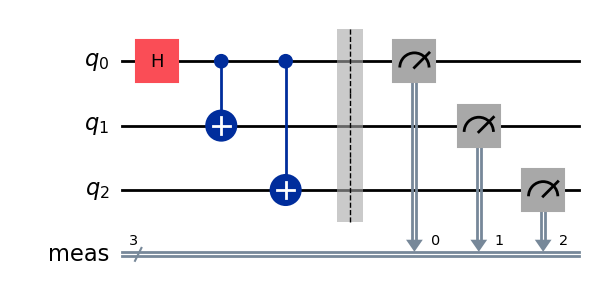

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure_all()
circuit.draw("mpl")

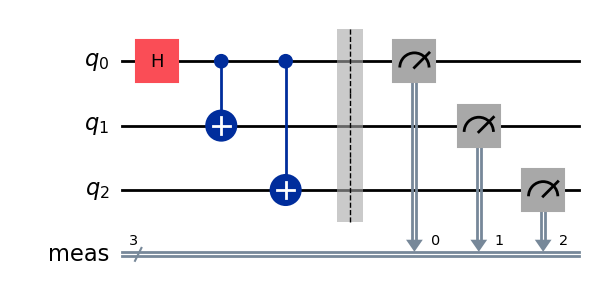

In [ ]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend)
trans_qc.draw("mpl")

In [ ]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while


print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

Job ID is a70f84a8-ffa8-11ef-b62e-0242ac1c000c 

Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.DONE
{'000': 542, '111': 482}


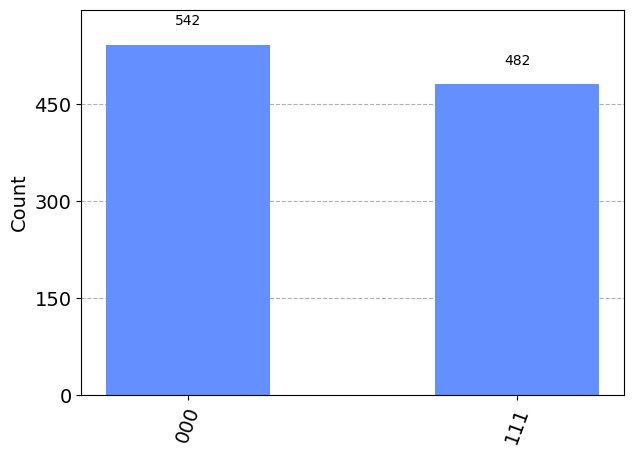

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)